데이터셋을 성공적으로 불러왔습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: fl

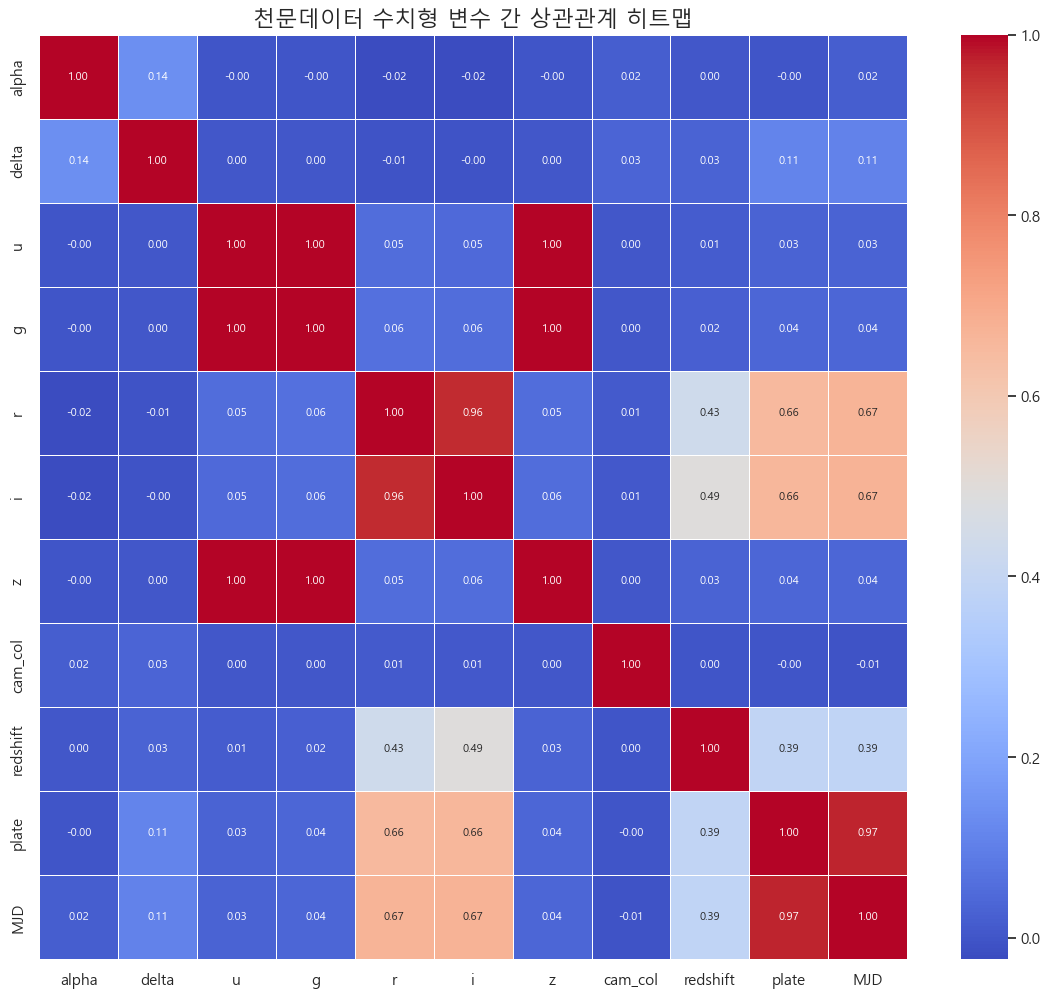

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rc("font", family = "Malgun Gothic")

file_path = 'star_classification.csv'

try:
    df = pd.read_csv(file_path)
    print("데이터셋을 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. Kaggle에서 다운로드했는지 확인해주세요.")
    exit()
df.info()
df.drop(["rerun_ID","obj_ID","run_ID","field_ID","spec_obj_ID","fiber_ID"],axis=1,inplace=True)
# 모든 숫자형 관측 데이터를 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64'])


# 상관관계 행렬 계산
correlation_matrix = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    annot_kws={"size": 8}
)
plt.title('천문데이터 수치형 변수 간 상관관계 히트맵', fontsize=16)
plt.show()

## 1. 전체 관측 변수 간 상관관계 히트맵
그래프의 의미: 이 히트맵은 데이터셋에 있는 모든 숫자형 변수들끼리 얼마나 강한 선형 관계를 갖는지 보여줍니다. 붉은색에 가까울수록 강한 양의 상관관계(하나가 증가하면 다른 하나도 증가), 푸른색에 가까울수록 강한 음의 상관관계(하나가 증가하면 다른 하나는 감소)를 의미합니다. 값은 -1에서 1 사이이며, 0에 가까우면 관계가 거의 없습니다.

핵심 해석:

redshift(적색편이)는 색 필터(r, i)와 매우 강한 양의 상관관계(0.43 ~ 0.49)를 보입니다. 이는 천체의 색상 정보가 그 천체가 얼마나 멀리 있는지를 예측하는 데 매우 중요한 단서임을 의미합니다.

각 색 필터들끼리도 서로 매우 강하게 연관(0.85 이상)되어 있습니다. 이는 특정 필터에서 밝게 관측된 천체는 다른 필터에서도 밝게 관측될 가능성이 높다는 것을 뜻합니다.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

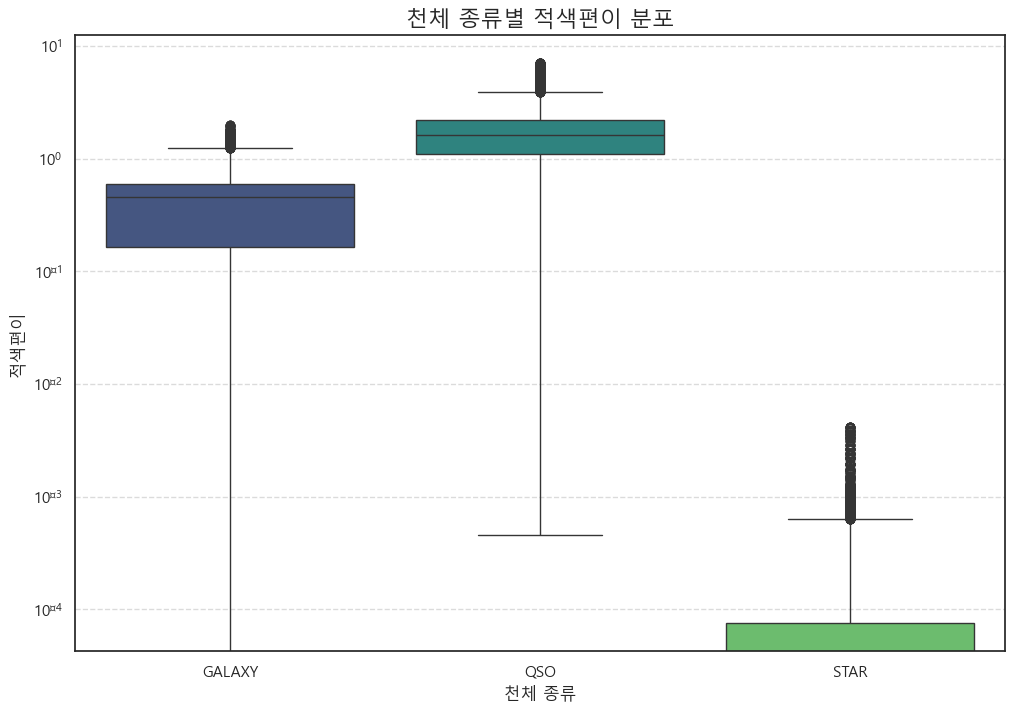

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='redshift', data=df, palette='viridis',hue="class", legend=False)
plt.title('천체 종류별 적색편이 분포', fontsize=16)
plt.xlabel('천체 종류', fontsize=12)
plt.ylabel('적색편이', fontsize=12)
# y축을 로그 스케일로 변경하여 분포를 더 명확하게 확인
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 이 플롯에서 이상치(plot 4분위 밖에 있는 값)는 머신러닝 할 때 처리하겠다 설명

## 2. 천체 종류에 따른 적색편이 분포
그래프의 의미: 이 박스 플롯은 세 가지 천체 종류(STAR, GALAXY, QSO)별로 적색편이(redshift) 값의 분포를 비교합니다. 적색편이는 천체가 우리로부터 멀어지는 속도를 나타내며, 보통 천체까지의 거리에 비례합니다.

핵심 해석:

**QSO(퀘이사)**의 적색편이 분포가 GALAXY(은하)나 STAR(별)에 비해 압도적으로 높습니다. 이는 퀘이사가 우주에서 관측 가능한 가장 멀리 있는 천체 중 하나라는 사실을 명확히 보여줍니다.

**STAR(별)**의 적색편이는 거의 0에 가깝습니다. 이는 별들이 우리 은하 내, 즉 천문학적 관점에서는 아주 가까운 거리에 있기 때문입니다.

이 그래프 하나만으로도 적색편이 값은 천체의 종류를 구분하는 데 매우 결정적인 특징임을 알 수 있습니다.

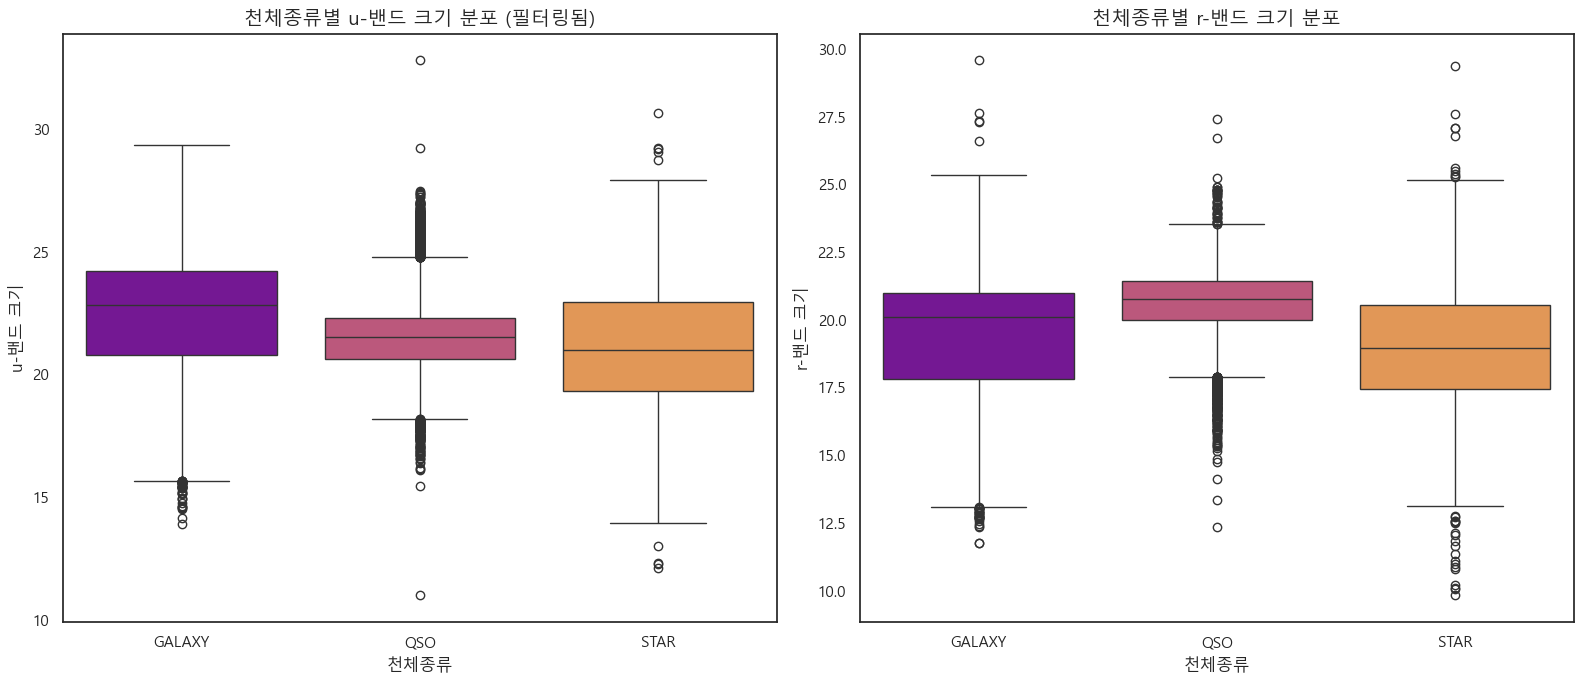

In [22]:
df_filtered = df[df['u'] > 0] # 이상치 제거
# df_filtered = df


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# u-band (자외선) 밝기 분포 (필터링된 데이터 사용)
sns.boxplot(ax=axes[0], x='class', y='u', data=df_filtered, 
            hue='class', legend=False, palette='plasma')
axes[0].set_title('천체종류별 u-밴드 크기 분포 (필터링됨)', fontsize=14)
axes[0].set_xlabel('천체종류', fontsize=12)
axes[0].set_ylabel('u-밴드 크기', fontsize=12)

# r-band (적색) 밝기 분포
sns.boxplot(ax=axes[1], x='class', y='r', data=df, 
            hue='class', legend=False, palette='plasma')
axes[1].set_title('천체종류별 r-밴드 크기 분포', fontsize=14)
axes[1].set_xlabel('천체종류', fontsize=12)
axes[1].set_ylabel('r-밴드 크기', fontsize=12)

plt.tight_layout()
plt.show()

## 3. 천체 종류에 따른 밝기 분포
그래프의 의미: 이 두 개의 박스 플롯은 천체 종류별로 **자외선 영역(u-band)**과 **적색 영역(r-band)**에서의 밝기 분포를 각각 보여줍니다. (참고: 천문학에서 등급(Magnitude)은 숫자가 작을수록 더 밝습니다.)

핵심 해석:

두 필터에서 밝기 분포 양상이 다릅니다. 예를 들어, GALAXY와 STAR는 r-band(오른쪽)에서는 밝기 분포가 매우 비슷하지만, u-band(왼쪽)에서는 GALAXY가 STAR보다 어둡게(등급이 높게) 나타나는 경향이 있습니다.

이러한 '색깔'의 차이는 천문학자들이 천체를 분류하는 중요한 기준이 됩니다. 특정 색 필터에서 유독 밝거나 어두운 특성을 이용해 천체의 종류를 유추할 수 있습니다.

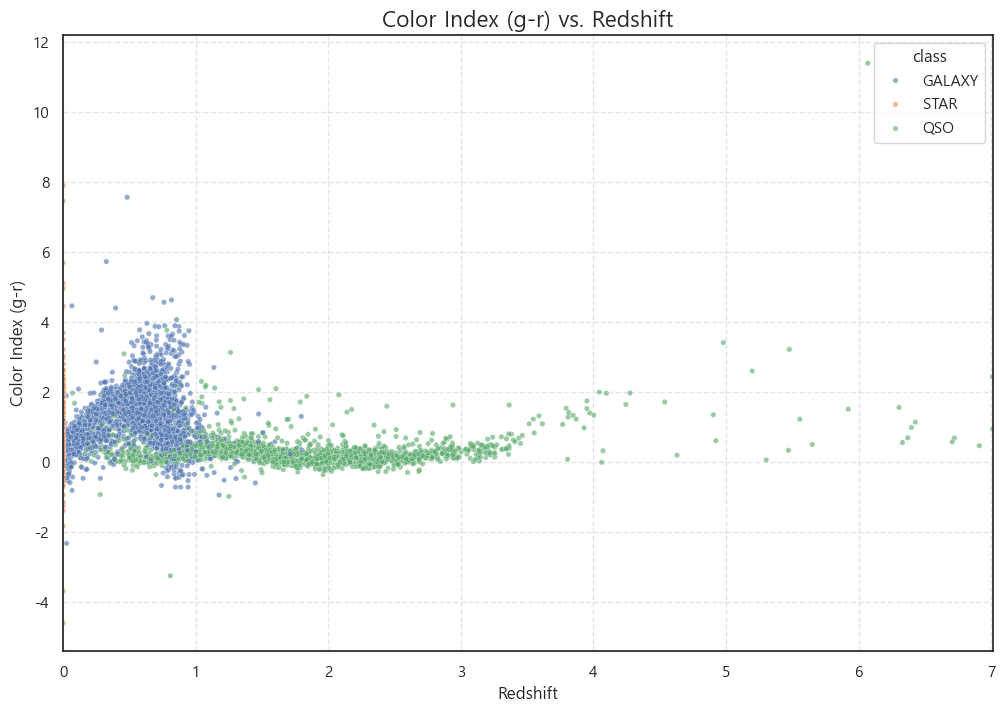

In [18]:
# 색 지수 (g-r) 계산
df['color_index'] = df['g'] - df['r']

# 데이터가 많으므로 10000개만 샘플링하여 시각화
df_sample = df.sample(n=10000, random_state=42)
# df_sample = df

plt.figure(figsize=(12, 8))
sns.scatterplot(x='redshift', y='color_index', hue='class', data=df_sample, alpha=0.6, s=15)
plt.title('Color Index (g-r) vs. Redshift', fontsize=16)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Color Index (g-r)', fontsize=12)
plt.xlim(df_sample['redshift'].min(), df_sample['redshift'].max())
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 4. 적색편이에 따른 색 변화 분석
그래프의 의미: 이 산점도는 천체의 거리(redshift, x축)와 색깔(color_index, y축) 사이의 관계를 보여줍니다. 여기서 색 지수(g-r)는 녹색 필터 밝기에서 적색 필터 밝기를 뺀 값으로, 이 값이 클수록 천체가 더 붉게 보인다는 의미입니다.

핵심 해석:

전반적으로 redshift가 증가할수록 color_index도 함께 증가하는 뚜렷한 경향을 보입니다.

이는 매우 중요한 의미를 갖는데, 바로 **"멀리 있는 천체일수록 더 붉게 보인다"**는 우주 팽창의 관측적 증거를 보여주는 것입니다. 빛이 먼 거리를 이동하면서 파장이 길어지는(붉어지는) 현상이 데이터에 그대로 나타난 것입니다.

또한, STAR, GALAXY, QSO가 이 그래프 상에서 서로 다른 영역에 군집을 이루고 있어, 거리와 색깔 정보의 조합이 천체 분류에 매우 효과적임을 알 수 있습니다.

데이터셋에 있는 다른 값들(u, g, r, i, z 등)만 사용해서 적색편이(redshift) 값을 수학 공식처럼 정확하게 계산해낼 수는 없습니다.

대신, 다른 값들을 '단서' 또는 **'힌트'**로 사용하여 적색편이 값을 **'예측(Prediction)'**하는 것입니다. 이것이 바로 회귀분석의 핵심입니다.

## 예측(Prediction) vs. 계산(Calculation)의 차이
계산 (Calculation): 2 * x = y 와 같이, 입력값이 주어지면 항상 정해진 공식에 따라 오차 없이 정확한 결과가 나옵니다.

예측 (Prediction): 여러 단서(데이터)를 바탕으로 가장 가능성이 높은 결과를 추정하는 것입니다. 실제 값과 예측값 사이에는 항상 약간의 오차가 존재할 수 있습니다.

적색편이 (redshift) 값은 "정답"입니다.
이 값은 천체의 빛을 분광기(spectrograph)로 직접 관측하여 스펙트럼이 얼마나 이동했는지를 물리적으로 측정한 실제 측정값입니다.

다른 값들 (u, g, r, i, z 등)은 "힌트"입니다.
이 값들은 각기 다른 색 필터를 통해 천체의 밝기를 측정한 것입니다. 적색편이가 클수록 천체는 더 붉게 보이기 때문에, 이 밝기 값들은 적색편이와 매우 높은 상관관계를 가집니다.

## 쉬운 비유: 사람의 몸무게 예측하기
이 관계를 사람의 몸무게에 비유하면 쉽게 이해할 수 있습니다.

몸무게 = 적색편이 (redshift)

체중계로 직접 재야만 알 수 있는 **실제 값(정답)**입니다.

키, 허리둘레, 성별, 나이 = u, g, r, i, z 등의 측정값

몸무게와 관련이 깊은 힌트들입니다. 키가 크고 허리가 굵으면 몸무게가 많이 나갈 가능성이 높죠.

우리는 어떤 사람의 키와 허리둘레를 안다고 해서, 그 사람의 몸무게를 100% 정확하게 계산할 수는 없습니다. 하지만 "키가 이 정도고 허리가 이 정도니, 몸무게는 대략 이 정도일 것이다"라고 매우 근사하게 예측할 수는 있습니다.

## 그래서 회귀분석이 필요합니다
바로 이 지점에서 머신러닝 회귀분석 모델이 필요한 것입니다. 회귀 모델의 역할은 수많은 '힌트' 데이터(u, g, r, i, z 등)를 학습하여 '정답'(redshift)을 가장 잘 예측하는 최적의 수학적 관계(모델)를 스스로 찾아내는 것입니다.

따라서 처음에 보신 히트맵은 어떤 '힌트'가 '정답'을 예측하는 데 더 강력한 단서가 되는지를 보여주는 지도와 같습니다.


천문학 데이터이기 때문에 값의 차이가 큼 -> 0~1의 값으로 정규화
많은 컬럼들은 PCA 차원 축소(컬럼 여러개를 하나로 합쳐서 머신러닝을 하기 쉽도록 처리)를 활용하여 머신러닝 효율성 확보
Grid search CV(최적의 매개변수를 구해주는 과정)을 통한 머신러닝 최적화
ID와 같은 예측과 관련 없는 컬럼 제거
차원 축소나 정규화는 테스트 데이터에만 사용 : 학습용 데이터와, 예측용 데이터 분리(이상치 처리 직후에)

선형회귀, 앙상블, decision tree(의사결정 트리), knn(최근접 이웃)
어떤 모델이 데이터의 특정을 가장 잘 나타내는지 찾기

회귀 성능 지표(MAE, MSE, R2) 활용하여 각각의 모델의 성능 검증
-> 모델별로 그래프 그려서 성능 시각화

DNN 심층 신경망까지 가능하다면 하기

활성함수 : linear
손실함수 : mse or mae(mse가 무난)
최적화 알고리즘(optimizer) : adam
과적합 방지를 위한 dropout layer 추가 


## 천체 고유 정보
obj_ID: 객체 식별자. 이미지 카탈로그에서 각 천체를 구별하는 고유 번호
spec_obj_ID: 분광 객체 식별자. 분광 분석(빛의 파장을 분석)을 통해 얻은 천체의 고유 ID. 이 ID가 같으면 서로 다른 관측 기록이라도 같은 종류의 천체임을 의미함.

## 천체 위치 정보
alpha: 적경(Right Ascension). 천구(하늘) 상의 경도(가로 위치)를 나타내는 좌표값.
delta: 적위(Declination). 천구 상의 위도(세로 위치)를 나타내는 좌표값.

## 밝기 정보 (필터)
u: 자외선 필터로 측정한 밝기 등급.
g: 녹색 필터로 측정한 밝기 등급.
r: 적색 필터로 측정한 밝기 등급.
i: 근적외선 필터로 측정한 밝기 등급.
z: 적외선 필터로 측정한 밝기 등급.
참고: 천문학에서 등급(Magnitude)은 숫자가 작을수록 더 밝은 천체를 의미함.

## 관측 정보
class: 천체 종류. 'GALAXY'(은하), 'STAR'(별), 'QSO'(퀘이사) 중 하나로 분류
redshift: 적색편이. 빛의 파장이 길어지는 현상을 측정한 값, 천체가 우리로부터 얼마나 멀리 떨어져 있고 얼마나 빠르게 멀어지는지를 나타내는 핵심 지표
run_ID: 실행 번호. 특정 관측(스캔)을 식별하는 번호
rereun_ID: 재실행 번호. 이미지가 어떻게 처리되었는지를 명시하는 번호
cam_col: 카메라 열. 특정 관측에서 스캔 라인을 식별하는 번호
field_ID: 필드 번호. 관측된 하늘의 각 영역을 식별하는 번호
plate: 플레이트 ID. SDSS(관측 프로젝트)에서 빛을 모으는 데 사용된 각 플레이트를 식별하는 고유 번호
MJD: 수정 율리우스일(Modified Julian Date). 특정 데이터가 관측된 날짜
fiber_ID: 광섬유 ID. 각 관측에서 빛을 초점면으로 향하게 한 광섬유를 식별하는 번호